In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [3]:
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('concrete_data.csv')
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [5]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
X = df.drop(columns = ['Strength'])
y = df['Strength']

In [8]:
X_train ,  X_test , y_train , y_test = train_test_split(X ,y , test_size = 0.2 , random_state = 42)

In [9]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.627553179231485

In [10]:
np.mean(cross_val_score(lr , X, y , scoring = 'r2'))

0.4609940491662866

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\2775378192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\2775378192.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ip

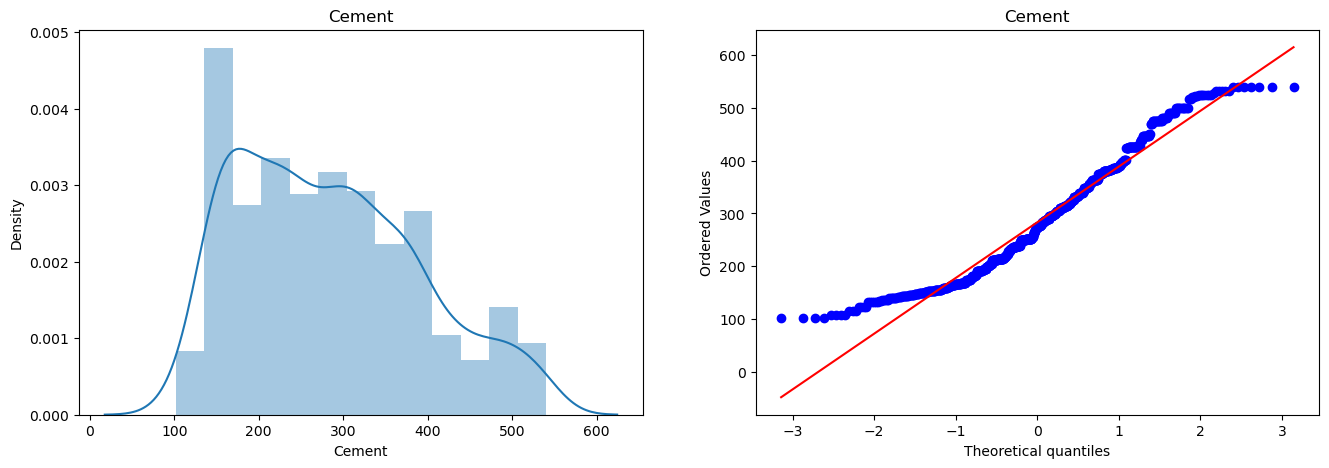

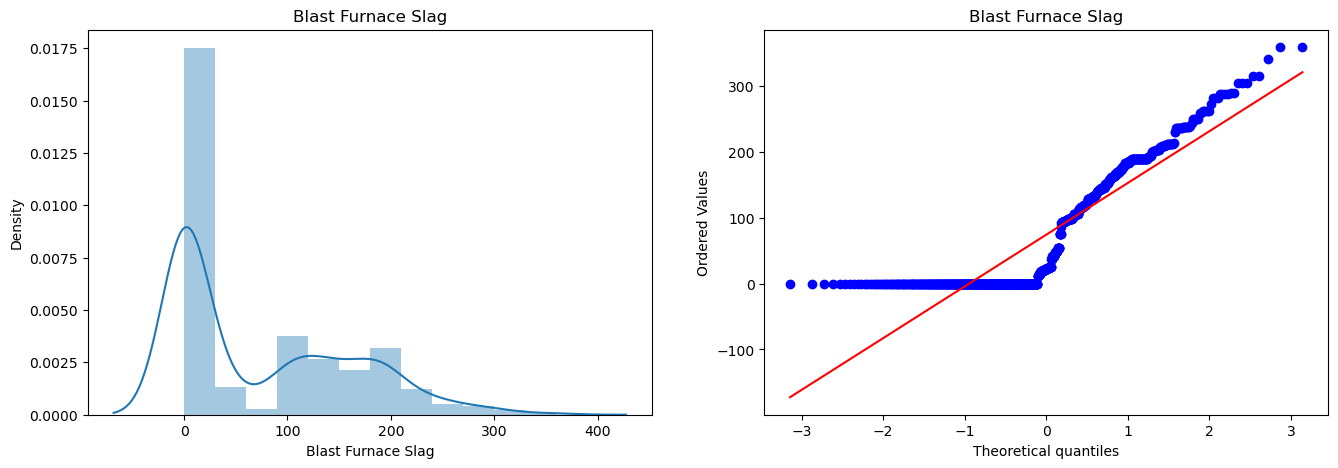

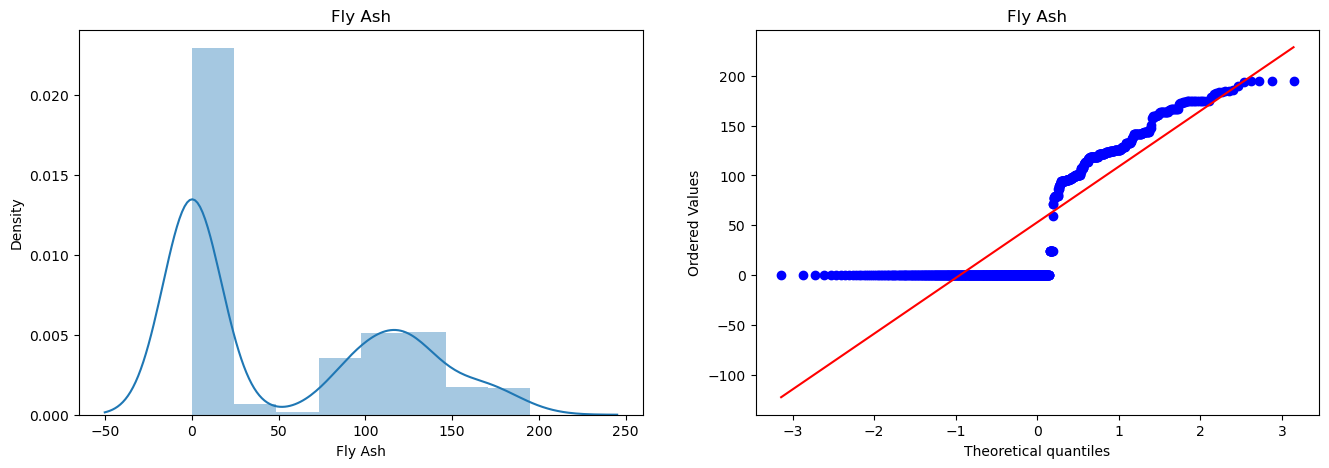

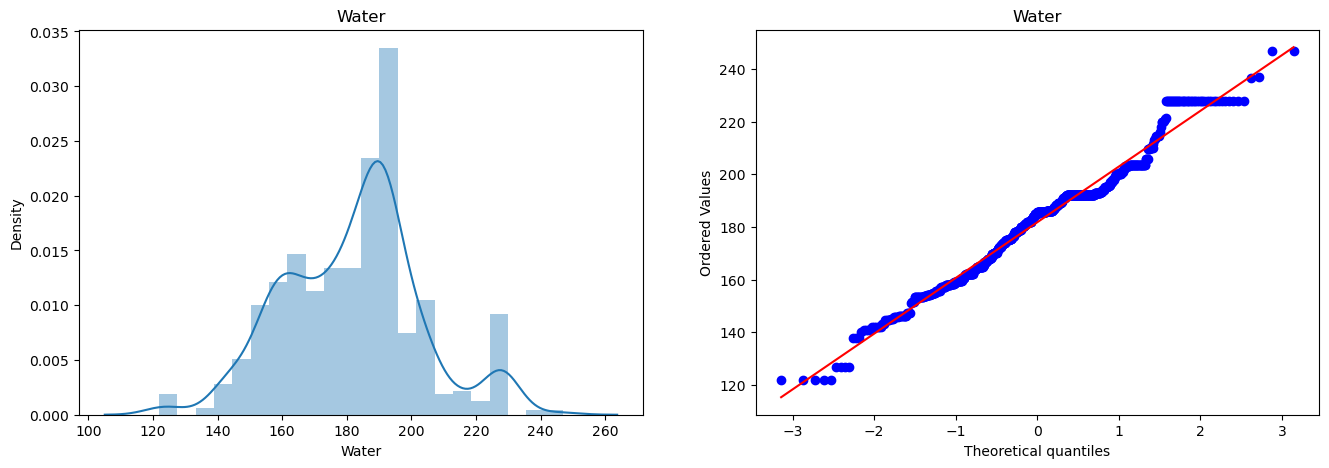

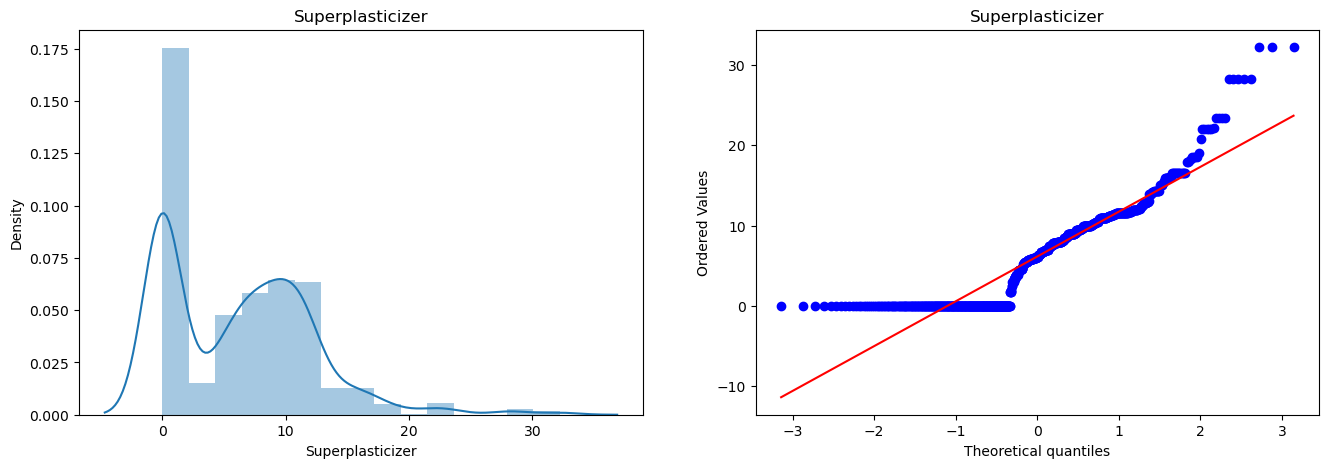

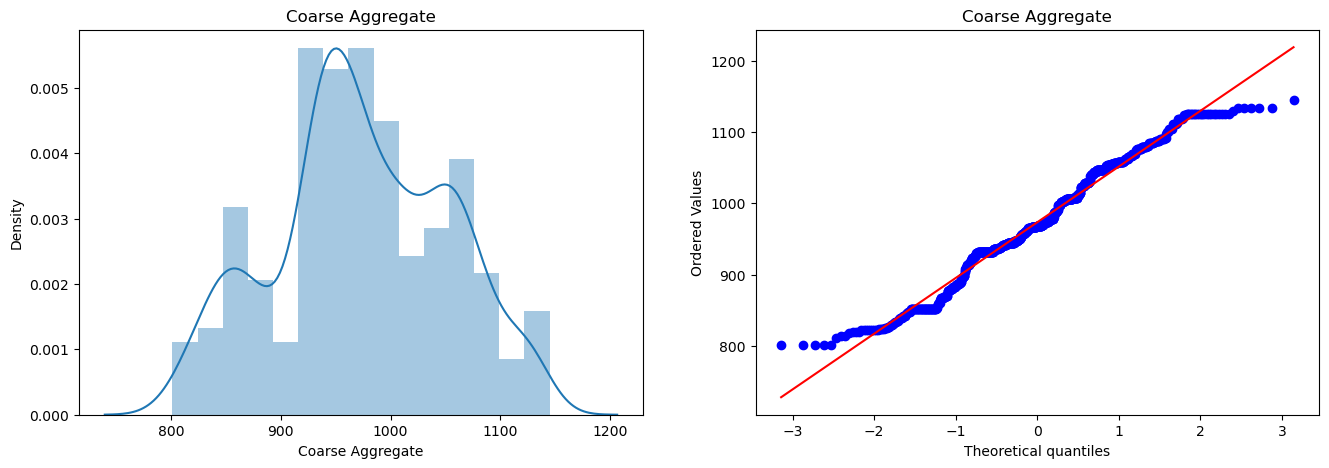

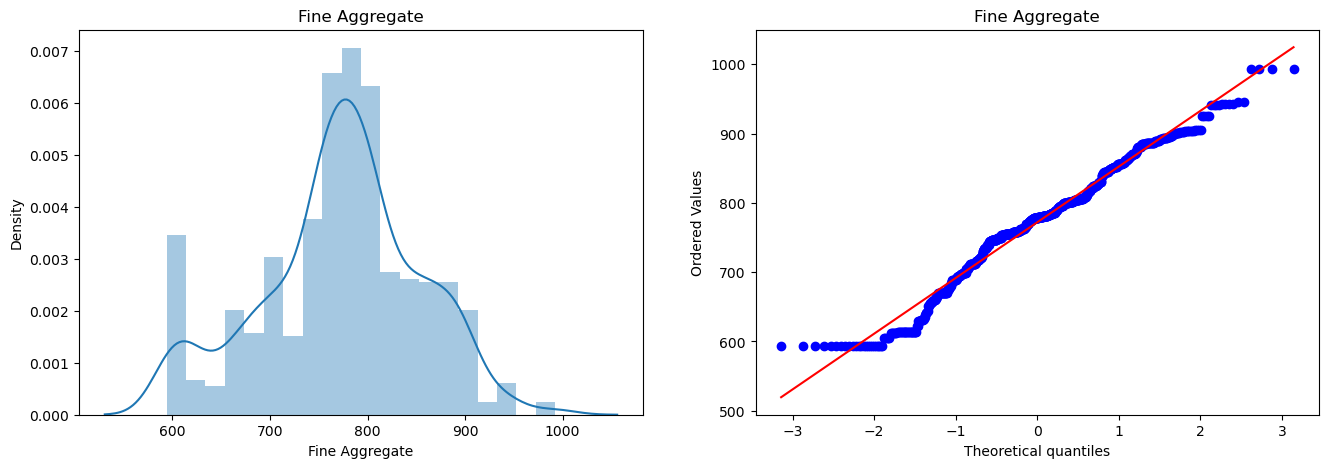

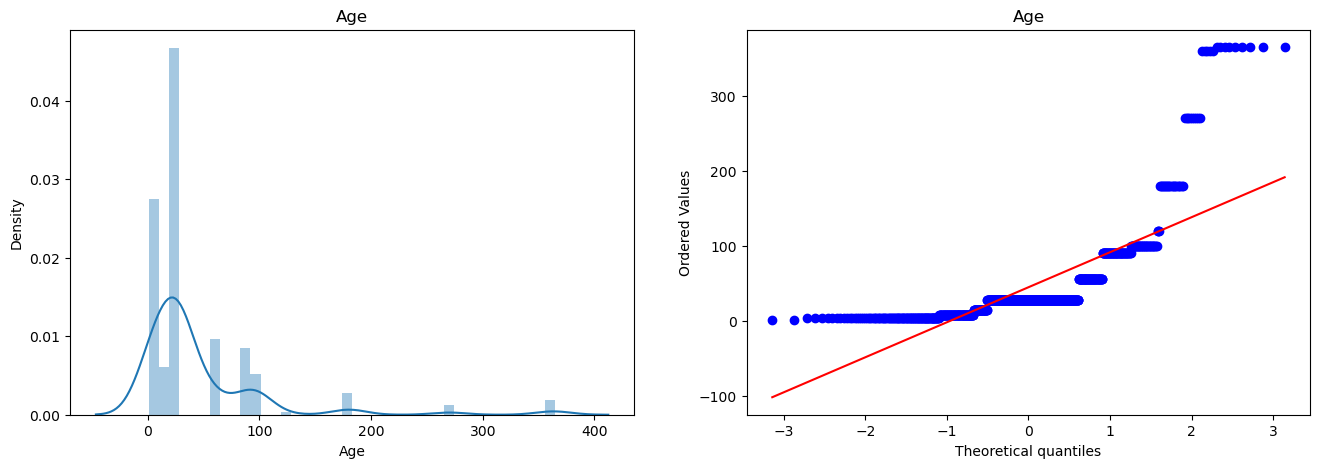

In [11]:
for col in X_train.columns:
    plt.figure(figsize = (16, 5))
    plt.subplot(1 , 2, 1)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(1 , 2, 2)
    stats.probplot(X_train[col] , dist = 'norm' , plot = plt)
    plt.title(col)

In [12]:
# apply box-cox

pt = PowerTransformer(method = 'box-cox')
pt = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + 0.000001)

In [13]:

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

cols  box_cox_lambdas
0              Cement         0.177025
1  Blast Furnace Slag         0.025093
2             Fly Ash        -0.038970
3               Water         0.772682
4    Superplasticizer         0.098811
5    Coarse Aggregate         1.129813
6      Fine Aggregate         1.782019
7                 Age         0.066631

In [14]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2)

0.8047825006181187

In [17]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219862

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


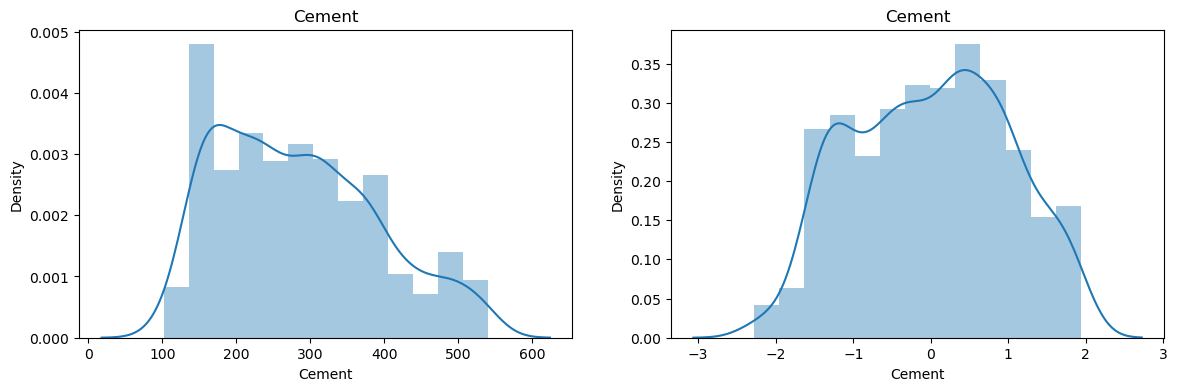

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


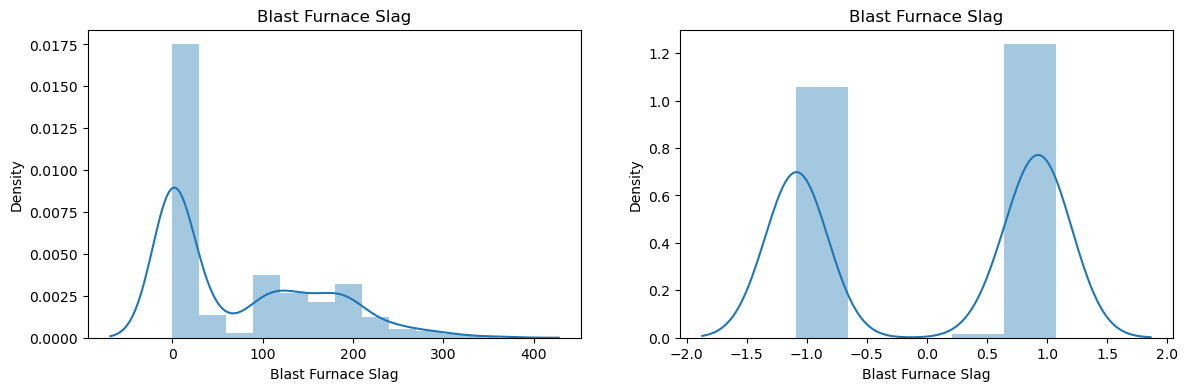

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


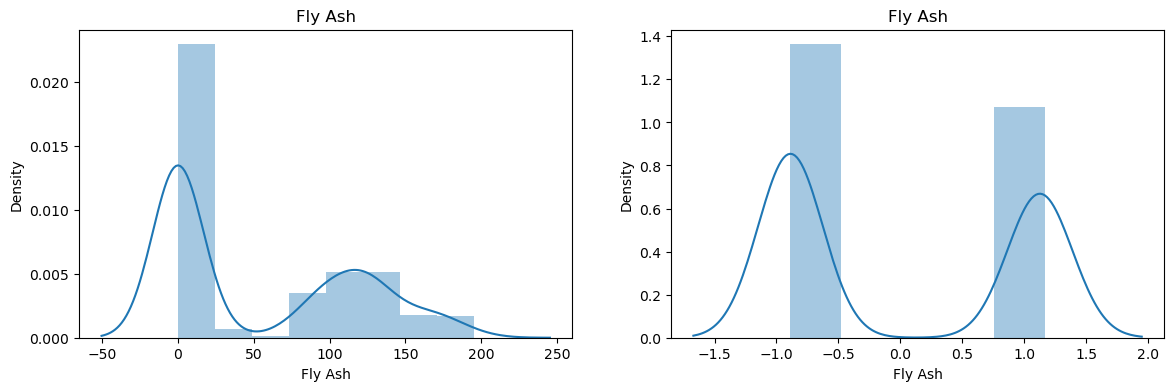

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


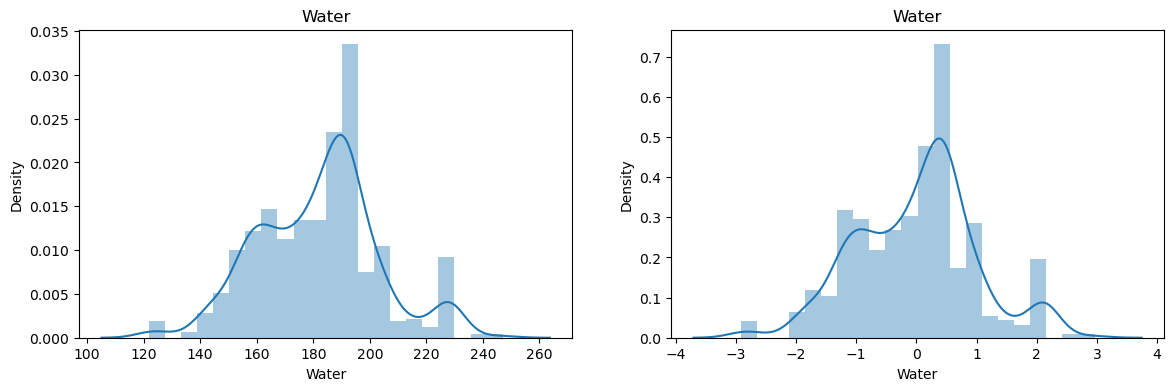

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


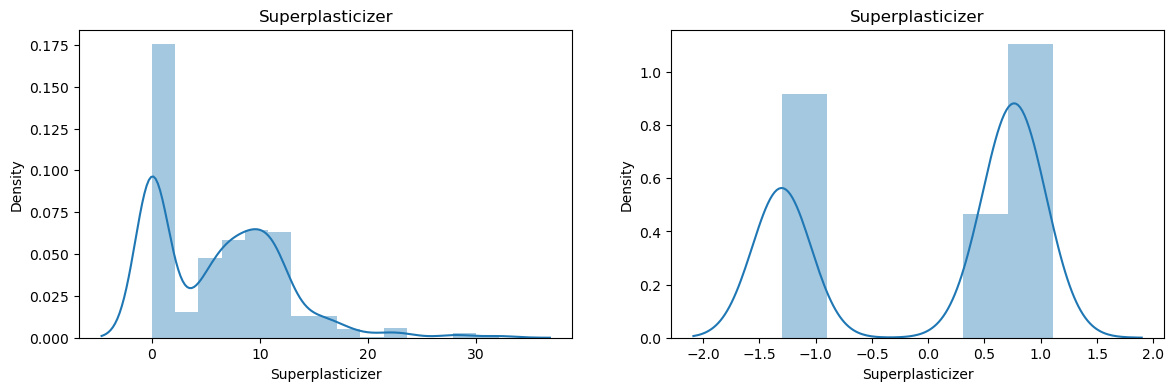

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


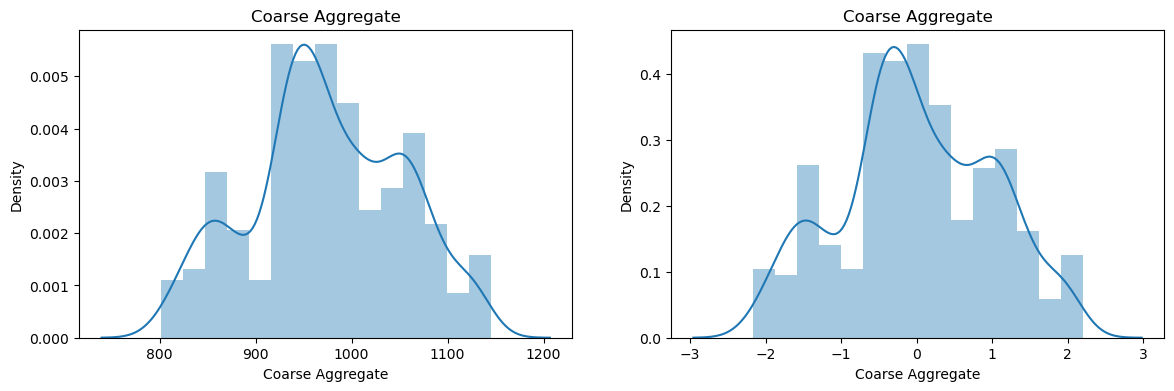

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


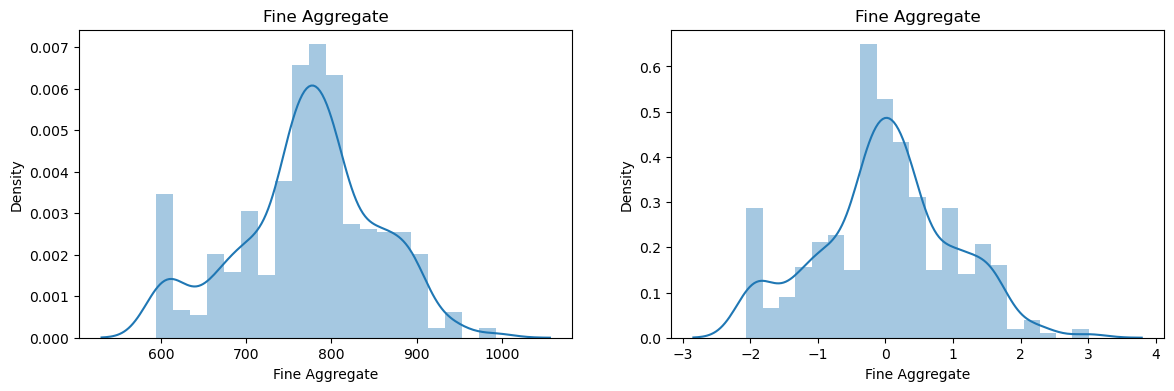

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\1031937615.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


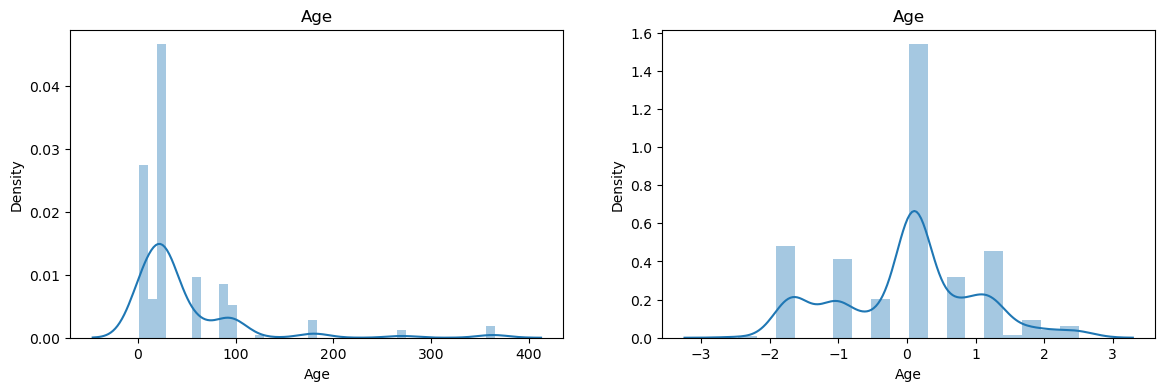

In [18]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

## YEO - JOHNSON Transformation

In [19]:
pt1 = PowerTransformer()   # by default value is yeo - jhonson

In [21]:
X_trained_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

In [23]:
lr2 = LinearRegression()
lr2.fit(X_trained_transformed2 , y_train)


LinearRegression()

In [25]:
y_pred3 = lr2.predict(X_test_transformed2)


In [26]:
print(r2_score(y_test , y_pred3))

0.8161906513339305


In [27]:
pd.DataFrame({'cols':X_train.columns , 'yeo-johnson': pt1.lambdas_})

cols  yeo-johnson
0              Cement     0.174348
1  Blast Furnace Slag     0.015715
2             Fly Ash    -0.161447
3               Water     0.771307
4    Superplasticizer     0.253935
5    Coarse Aggregate     1.130050
6      Fine Aggregate     1.783100
7                 Age     0.019885

In [33]:
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285743

In [36]:
X_train_transformed2 = pd.DataFrame(X_trained_transformed2,columns=X_train.columns)
X_train_transformed2

Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0   -1.279751            1.018168  1.130993 -0.301917          1.250424   
1    1.244813            0.222584  1.166671 -0.165051          0.643937   
2    0.079751           -1.056928  1.143637 -1.047299          0.796163   
3   -0.145770            0.835725  1.009268  0.581232          0.585508   
4   -1.131111            0.487511  1.150162 -1.105305          0.886463   
..        ...                 ...       ...       ...               ...   
819  0.183530            1.146737 -0.884932 -1.769937          0.924953   
820 -0.198870           -1.056928  1.151932 -1.839142          0.999192   
821 -0.844661           -1.056928  1.152152 -0.706091          0.796163   
822  1.565741            0.921796 -0.884932 -0.019305          0.689050   
823  0.426534           -1.056928  1.123673 -0.543872          0.806465   

     Coarse Aggregate  Fine Aggregate       Age  
0           -0.262504       -0.677567  0.105778  
1           -1.912717       -0.314063  0.105778  
2            1.018407        0.025954 -1.664976  
3           -1.750770        0.583249  0.105778  
4            1.368579        0.262619 -1.664976  
..                ...             ...       ...  
819          0.390560        0.358772 -1.664976  
820          1.445978        0.322793 -0.491262  
821          1.345370        0.297153  1.257511  
822         -1.537249        0.076208  0.105778  
823         -0.620837        0.095105  0.105778  

[824 rows x 8 columns]

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


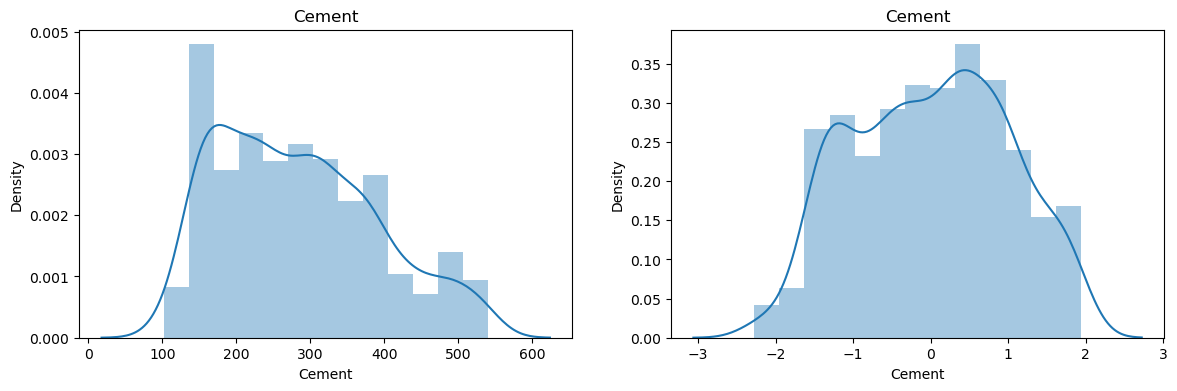

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


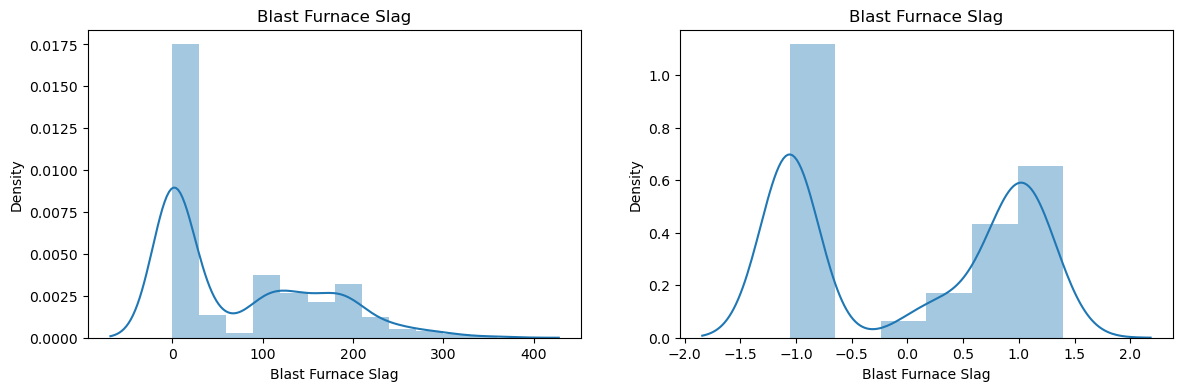

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


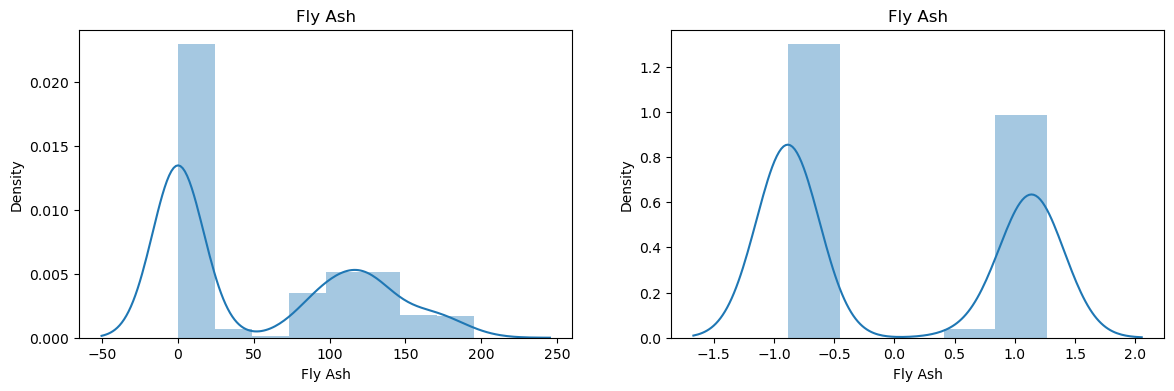

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


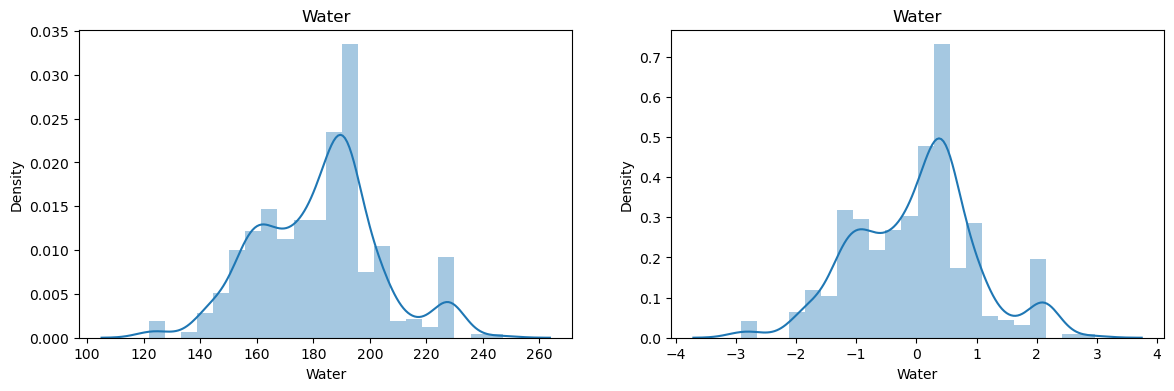

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


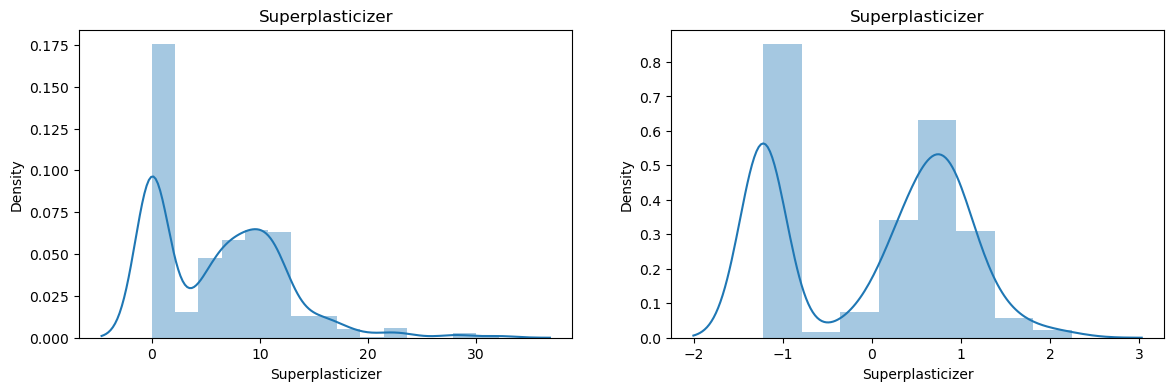

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


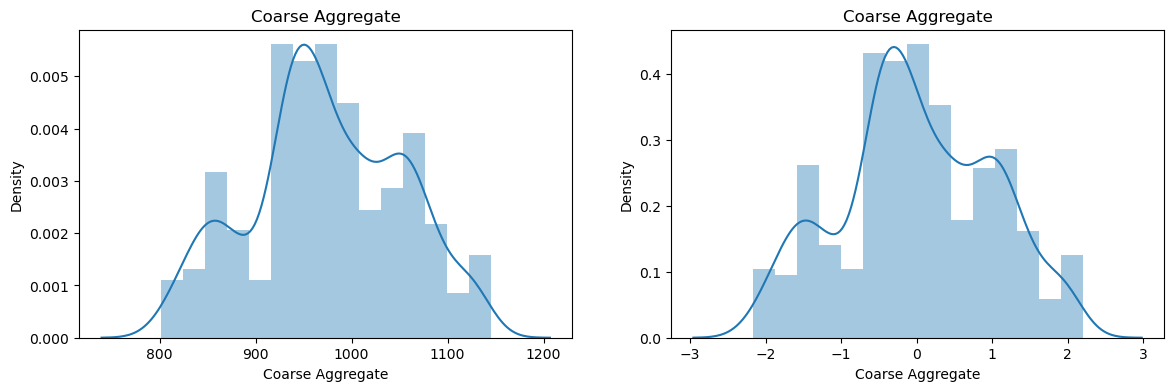

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


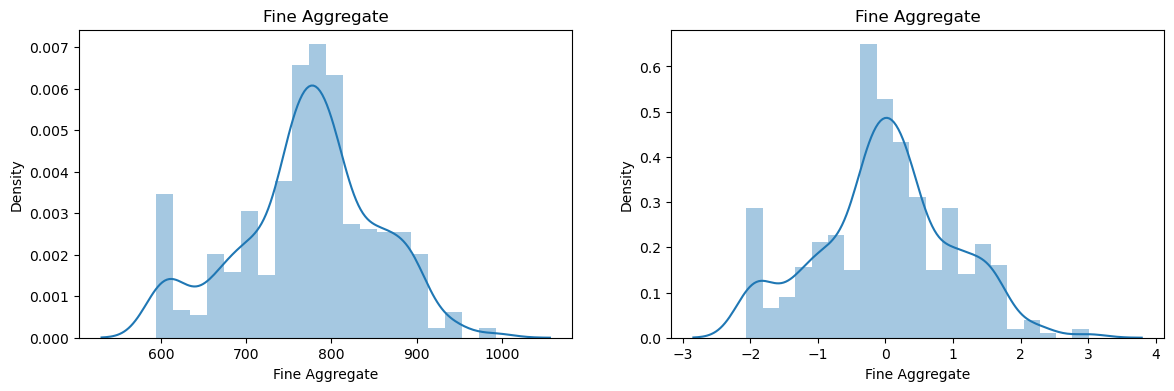

C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\Parveen\AppData\Local\Temp\ipykernel_18576\3759034249.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


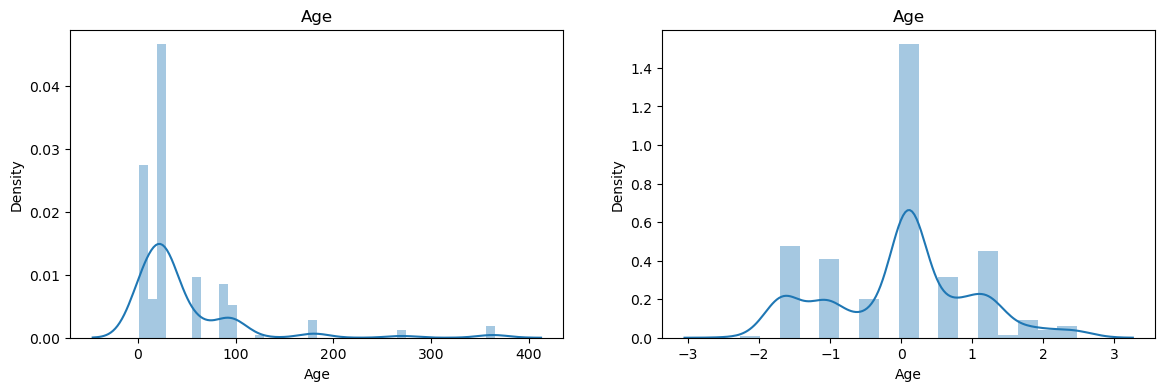

In [41]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()